# Alzheimer's Disease Classification (for ML learning purposes)

This notebook looks into using Python ML and Data Science libraries in an attempt to build a ML model capable of predicting whether or not someone has Alzheimer based on their medical attributes.

#### Approach taken:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition
> Given given parameters about a patient, can we predict whether or not they have Alzheimer disease?

## 2. Data
We’ll be using the ["Alzheimer's Disease Dataset"](https://www.kaggle.com/dsv/8668279) - source: Kaggle.

## 3. Evaluation
> Reach a minimum of 90% (0.9) model's accuracy classification on whether or not someone has Alzheimer disease.



In [111]:
# Regular EDA (Exploratory Data Analysis) and plotting libraries
%matplotlib inline 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

#Import models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

#Scaling
from sklearn import preprocessing

#SHAP
import shap
shap.initjs()

In [112]:
# Load data
alzheimer_disease = pd.read_csv("./data/alzheimers_disease_data.csv")

#alzheimer_disease.info()

# drop XXXConfid column as a default value to all
alzheimer_disease.drop(["PatientID", "DoctorInCharge"], axis=1, inplace=True)

alzheimer_disease

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,...,6.518877,0,0,1.725883,0,0,0,1,0,0
1,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,...,7.118696,0,0,2.592424,0,0,0,0,1,0
2,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,...,5.895077,0,0,7.119548,0,1,0,1,0,0
3,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,...,8.965106,0,1,6.481226,0,0,0,0,0,0
4,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,...,6.045039,0,0,0.014691,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,7.535540,...,0.238667,0,0,4.492838,1,0,0,0,0,1
2145,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,8.555256,...,8.687480,0,1,9.204952,0,0,0,0,0,1
2146,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,5.769464,...,1.972137,0,0,5.036334,0,0,0,0,0,1
2147,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,8.322874,...,5.173891,0,0,3.785399,0,0,0,0,1,1


In [113]:
# EDA (Exploratory Data Analysis)

f"Shape: {alzheimer_disease.shape}"

alzheimer_disease.info()

#alzheimer_disease.describe


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        2149 non-null   int64  
 1   Gender                     2149 non-null   int64  
 2   Ethnicity                  2149 non-null   int64  
 3   EducationLevel             2149 non-null   int64  
 4   BMI                        2149 non-null   float64
 5   Smoking                    2149 non-null   int64  
 6   AlcoholConsumption         2149 non-null   float64
 7   PhysicalActivity           2149 non-null   float64
 8   DietQuality                2149 non-null   float64
 9   SleepQuality               2149 non-null   float64
 10  FamilyHistoryAlzheimers    2149 non-null   int64  
 11  CardiovascularDisease      2149 non-null   int64  
 12  Diabetes                   2149 non-null   int64  
 13  Depression                 2149 non-null   int64

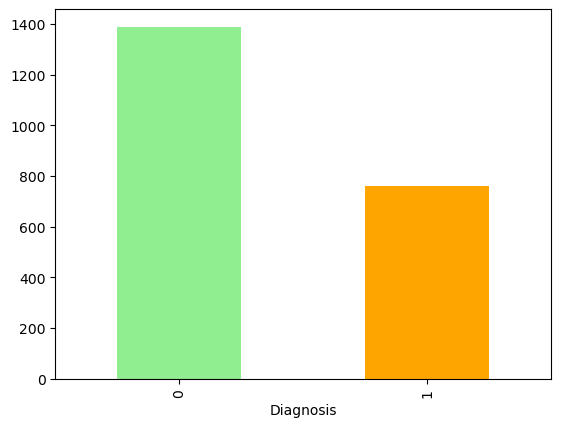

In [114]:
alzheimer_disease["Diagnosis"].value_counts()

alzheimer_disease["Diagnosis"].value_counts().plot(kind="bar", color=["lightgreen", "orange"]);

''

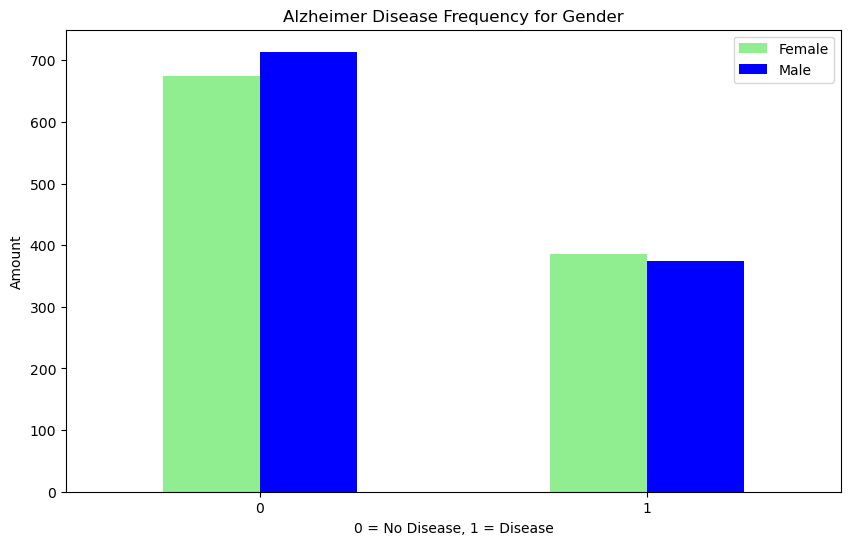

In [115]:


pd.crosstab(alzheimer_disease.Diagnosis, alzheimer_disease.Gender)
pd.crosstab(alzheimer_disease.Diagnosis, alzheimer_disease.Gender).plot(kind="bar",
                                                                    figsize=(10, 6),
                                                                    color = ["lightgreen", "blue"]
                                                                    )
plt.title("Alzheimer Disease Frequency for Gender")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0)


;

''

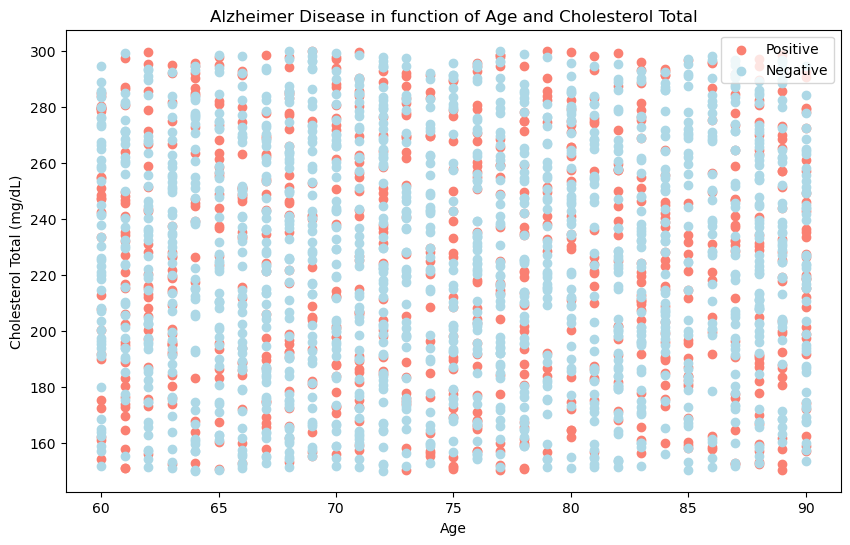

In [116]:
# Create another figure
plt.figure(figsize=(10,6))


#Scatter Positive diagnosis
plt.scatter(alzheimer_disease.Age[alzheimer_disease.Diagnosis==1],
            alzheimer_disease.CholesterolTotal[alzheimer_disease.Diagnosis==1],
            c= "salmon" )


#Scatter Negative diagnosis
plt.scatter(alzheimer_disease.Age[alzheimer_disease.Diagnosis==0],
            alzheimer_disease.CholesterolTotal[alzheimer_disease.Diagnosis==0],
            c = "lightblue")

#Add some helpul info
plt.title("Alzheimer Disease in function of Age and Cholesterol Total")
plt.xlabel("Age")
plt.ylabel("Cholesterol Total (mg/dL)")
plt.legend(["Positive", "Negative"], loc="upper right")

;

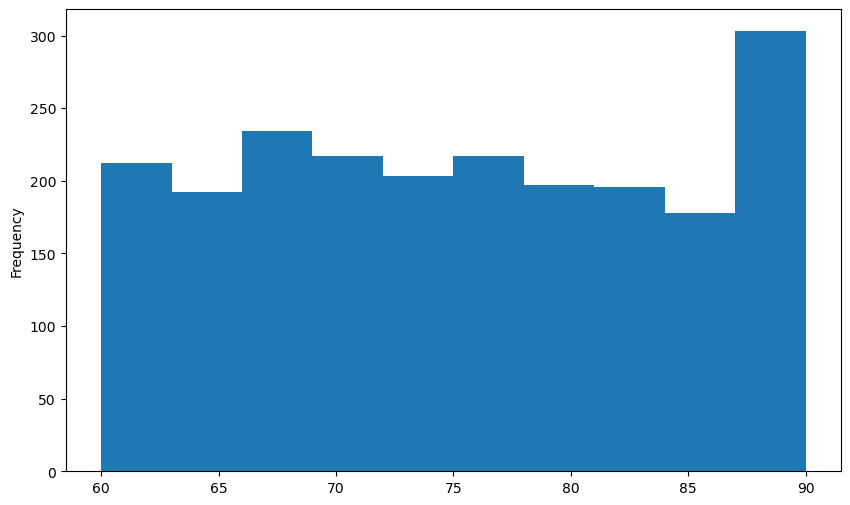

In [117]:
# check the distribution
plt.figure(figsize=(10,6))

alzheimer_disease["Age"].plot.hist();

## Alzheimer Disease Frequency per Education

EducationLevel: The education level of the patients, coded as follows:
- 0: None
- 1: High School
- 2: Bachelor's
- 3: Higher

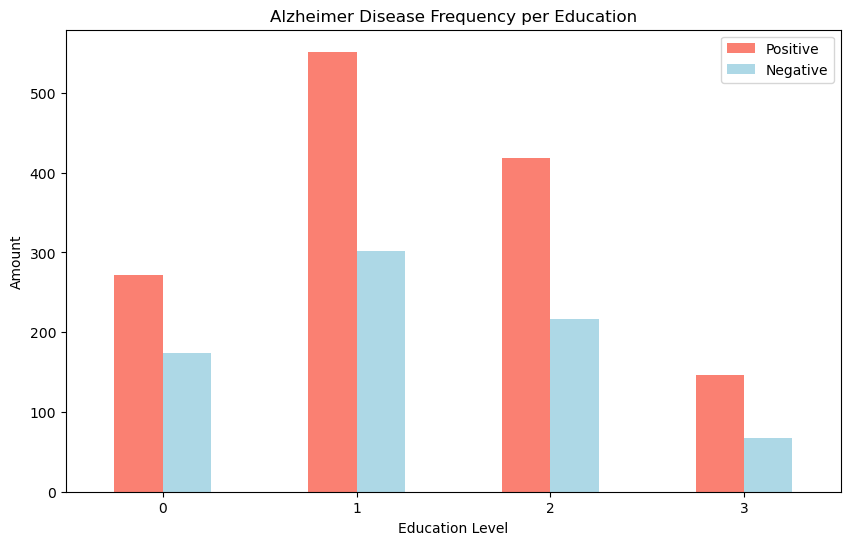

In [119]:
pd.crosstab(alzheimer_disease.EducationLevel, alzheimer_disease.Diagnosis).plot(kind="bar",
                                                                                figsize=(10,6),
                                                                                color=["salmon", "lightblue"],
                                                                                rot=1,);
plt.title("Alzheimer Disease Frequency per Education")
plt.xlabel("Education Level")
plt.ylabel("Amount")
plt.legend(["Positive", "Negative"]);
                                                                                                    

## Correlation metrics: How features are correlated?

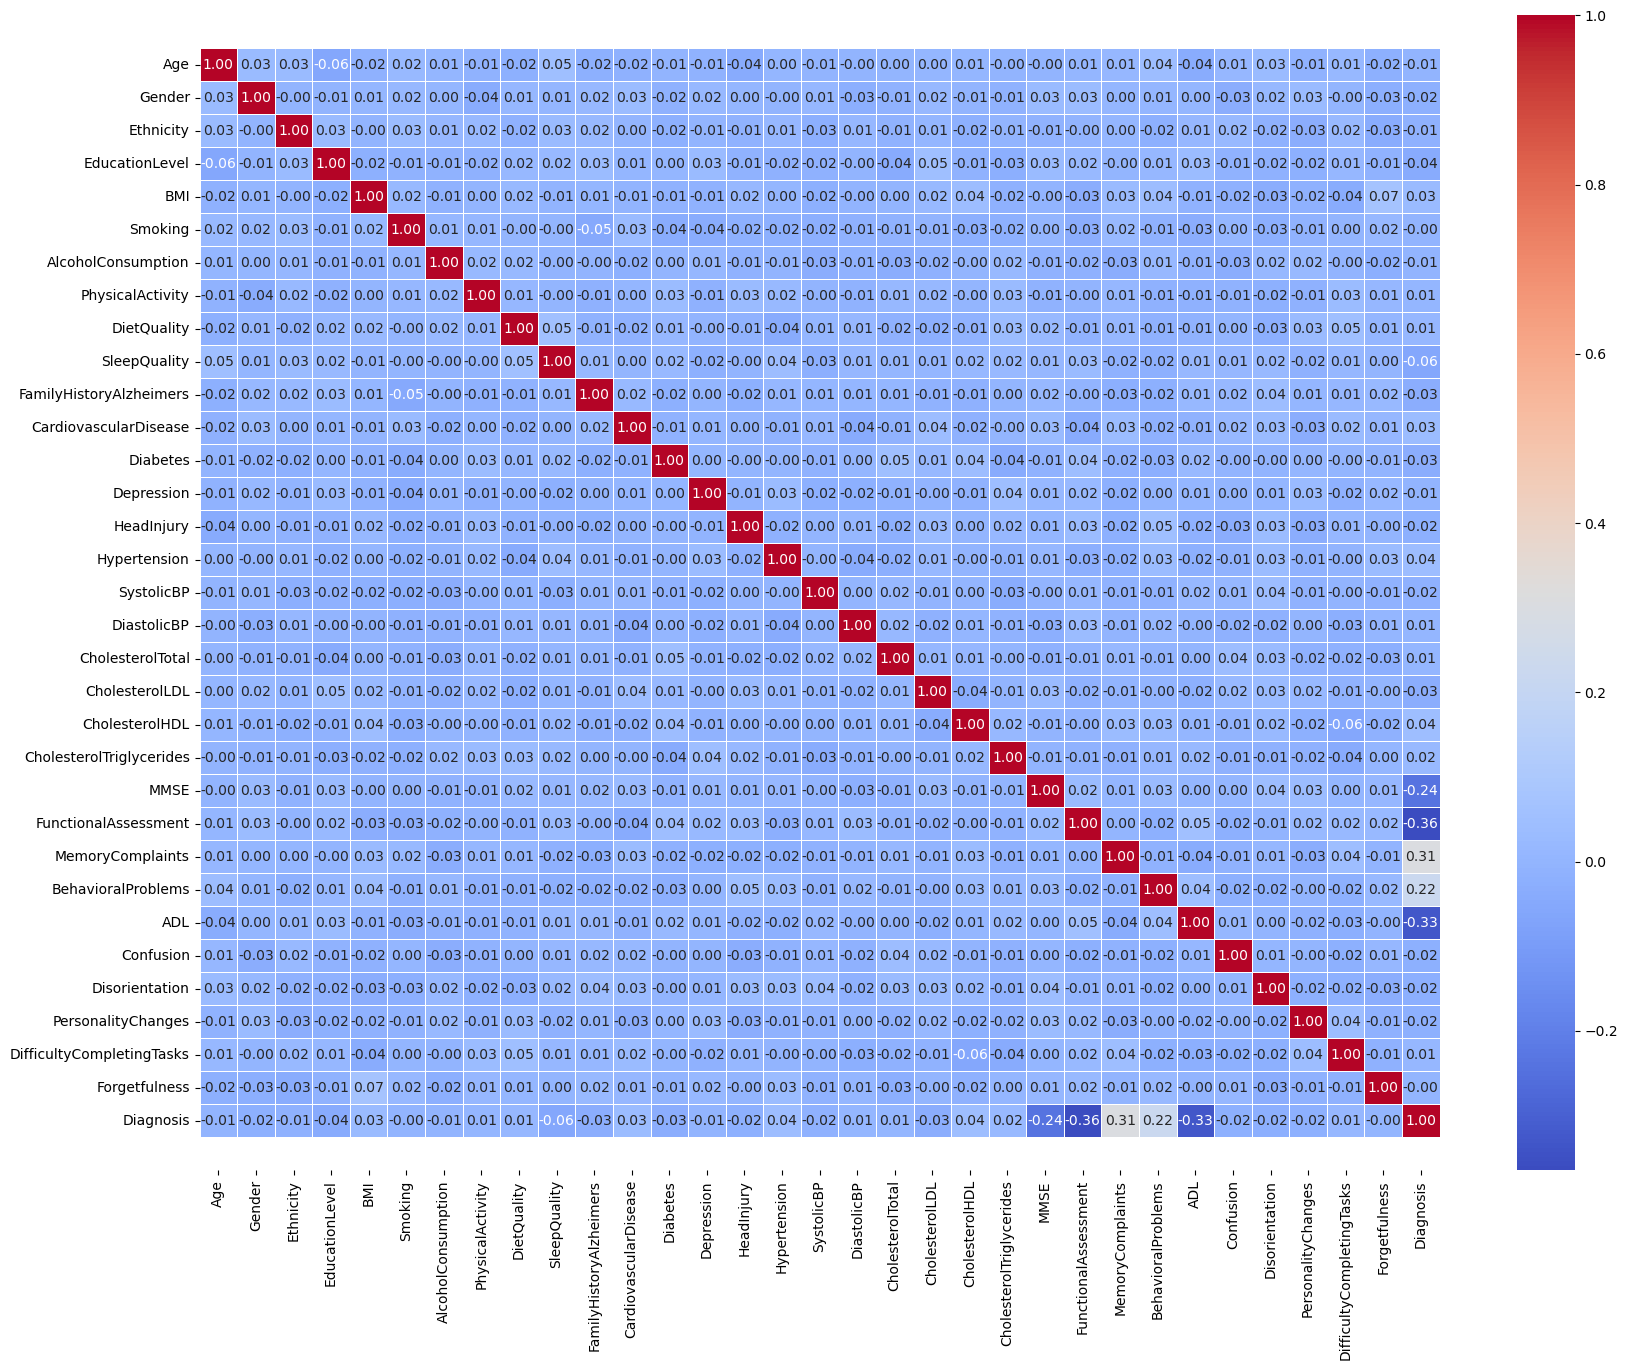

In [121]:
#alzheimer_disease.head(10)

corr_matrix = alzheimer_disease.corr()
fig, ax = plt.subplots(figsize=(20, 15))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt='.2f',
                cmap="coolwarm")


bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 1, top - 1);


## Modelling

In [123]:
alzheimer_disease.head(5)

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,...,6.518877,0,0,1.725883,0,0,0,1,0,0
1,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,...,7.118696,0,0,2.592424,0,0,0,0,1,0
2,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,...,5.895077,0,0,7.119548,0,1,0,1,0,0
3,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,...,8.965106,0,1,6.481226,0,0,0,0,0,0
4,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,...,6.045039,0,0,0.014691,0,0,1,1,0,0


In [124]:
# Split data into X and y
X = alzheimer_disease.drop("Diagnosis", axis=1)
y = alzheimer_disease["Diagnosis"]

X.shape, y.shape

((2149, 32), (2149,))

In [125]:
# Split data into train and test data
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1719, 32), (1719,), (430, 32), (430,))

In [126]:
X_train.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness
1433,87,1,2,1,27.764232,1,16.543170,0.281379,5.923418,7.836104,...,25.399206,3.085543,0,0,6.643693,0,0,0,0,0
630,70,0,0,3,37.098744,0,1.360202,9.242990,1.819284,5.218052,...,8.292136,5.616830,0,1,3.884562,0,0,0,0,1
78,82,1,3,2,15.908275,0,16.329031,1.915913,6.607292,6.146166,...,21.042238,3.662461,0,0,4.013722,0,0,1,1,0
366,76,1,0,2,30.302432,1,11.814030,6.281170,6.204349,6.825155,...,28.609438,4.648135,0,0,9.355700,1,0,1,0,1
1996,61,0,0,2,24.565357,1,2.273373,9.976581,2.057188,4.715534,...,2.629135,9.601238,1,0,8.818932,0,1,0,0,0


### Scaling the data

In [128]:
# scaling X train and X test to improve LogisticRegression() score
scaler_X = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler_X.transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

### Set up a function to optmize models evaluation

In [130]:
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Random Forest Clf": RandomForestClassifier()
}

def fit_and_evaluate(models, X_train, y_train, X_test, y_test):
    """
    Fits and evaluates given Machine Learning Models.

    models: A DICT of models to be evaluated.
    X_train: an array with X train (features)
    y_train: an array with y train (labels)
    X_test: an array with X test (unseen data) (features)
    y_test: an array with y test (unseen data) (labels)    
    """
    results = {}

    #set a random seed
    np.random.seed(42)
    
    #fit the data
    for name, model in models.items():
            model.fit(X_train, y_train)
            results[name] = model.score(X_test, y_test)
    return results

scores = fit_and_evaluate(models, X_train_scaled, y_train, X_test_scaled, y_test)

scores
    

{'Logistic Regression': 0.8302325581395349,
 'KNN': 0.7186046511627907,
 'Random Forest Clf': 0.9255813953488372}

### Model Comparison

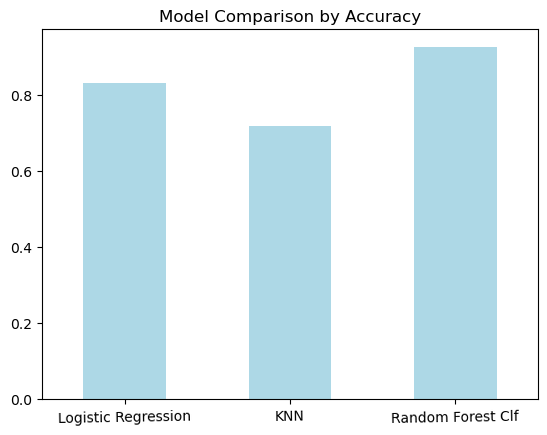

In [132]:
model_compare = pd.DataFrame(scores, index=["accuracy"])
model_compare.T.plot.bar(rot=1, 
                        color="lightblue",
                        title="Model Comparison by Accuracy",
                        legend=False);



## Data Analysis Experimentation
1. Hyperparameter tuning
2. Feature importance
3. Classification
    * ROC Curve
    * AUC (Area under the curve)
    * Confusion Matrix
    * Cross-Validation
    * Precision
    * Recall
    * F1 score
    * Classification Report


### 1.1 Hyperparameters tuning with `RandomizedSearchCV`

In [135]:
# create a hyperparamter grid for LogisticRegression
log_reg_grid = {
    "solver": ['liblinear'],
    "C": np.logspace(-4, 4, 20)}


np.random.seed(42)
rs_log_reg = RandomizedSearchCV(estimator = LogisticRegression(), 
                         param_distributions=log_reg_grid, 
                         n_iter=20, 
                         scoring="accuracy", 
                         n_jobs=1, 
                         cv=5, 
                         verbose=2)

# rs_log_reg.fit(X_train_scaled, y_train)
# rs_log_reg.score(X_test_scaled, y_test)

# rs_log_reg.best_params_ , rs_log_reg.score(X_test_scaled, y_test)



In [136]:
# create a hyperparamter grid for RandomForestClassifier
rf_clf_grid = {
    "max_features": ['sqrt', 'log2'],
    "n_estimators": np.arange(10, 1000, 20),
    "max_depth": [None, 3, 5, 10],
    "min_samples_split": np.arange(2, 20, 2),
    "min_samples_leaf": np.arange(1, 20, 2)
    }

np.random.seed(42)
rs_rf_clf = RandomizedSearchCV(estimator = RandomForestClassifier(), 
                         param_distributions=rf_clf_grid, 
                         n_iter=20, 
                         scoring="accuracy", 
                         n_jobs=1, 
                         cv=5, 
                         verbose=2)

# rs_rf_clf.fit(X_train_scaled, y_train)
# rs_rf_clf.score(X_test_scaled, y_test)



### 1.2 Hyperparameters tuning with `GridSearchCV`

In [138]:
# create a hyperparameter grid for LogisticRegression
log_reg_grid = {
    "solver": ['liblinear'],
    "C": np.logspace(-4, 4, 30)}


np.random.seed(42)
gs_log_reg = GridSearchCV(estimator = LogisticRegression(), 
                         param_grid=log_reg_grid, 
                         scoring="accuracy", 
                         n_jobs=1, 
                         cv=5, 
                         verbose=2)

# gs_log_reg.fit(X_train_scaled, y_train)
# gs_log_reg.score(X_test_scaled, y_test)
# gs_log_reg.best_params_

# # {'C': 0.01610262027560939, 'solver': 'liblinear'}


In [139]:
# create a hyperparamter grid for RandomForestClassifier
rf_clf_grid = {
    "max_features": ['sqrt'],
    "n_estimators": [10, 50, 100, 200, 500],
    "max_depth": [None, 5, 10],
    "min_samples_split": np.arange(2, 4, 1),
    "min_samples_leaf": np.arange(-2, 2, 1),
    }

np.random.seed(42)
gs_rf_clf = GridSearchCV(estimator = RandomForestClassifier(), 
                         param_grid=rf_clf_grid, 
                         scoring="accuracy", 
                         n_jobs=1, 
                         cv=5, 
                         verbose=2)

# gs_rf_clf.fit(X_train_scaled, y_train)
# gs_rf_clf.score(X_test_scaled, y_test)
# gs_rf_clf.best_params_

# # {'max_depth': None,
# #  'max_features': 'sqrt',
# #  'min_samples_leaf': 1,
# #  'min_samples_split': 3,
# #  'n_estimators': 200}

In [140]:
# rerun the model scoring after hyperparameters tuning 

models_tunned = {"RandomForestClassifier": RandomForestClassifier(max_depth = None, 
                                                         max_features = 'sqrt',
                                                         min_samples_leaf = 1,
                                                         min_samples_split = 3,
                                                         n_estimators = 200,
                                                         random_state = 42),
                 "LogisticRegression": LogisticRegression(C= 0.01610262027560939, solver= 'liblinear', random_state=42)
    
}

scores = fit_and_evaluate(models_tunned, X_train_scaled, y_train, X_test_scaled, y_test)
scores

{'RandomForestClassifier': 0.9395348837209302,
 'LogisticRegression': 0.8302325581395349}

## Model chosen: 
We will focus on the `RandomForestClassifier` model going forwards and it has the best scoring performance before/after hyperparameters tunning.

### 2. Feature Importance

In [143]:
clf = RandomForestClassifier(max_depth = None, 
                                                         max_features = 'sqrt',
                                                         min_samples_leaf = 1,
                                                         min_samples_split = 3,
                                                         n_estimators = 200,
                                                         random_state = 42)

clf.fit(X_train_scaled, y_train)


RandomForestClassifier(min_samples_split=3, n_estimators=200, random_state=42)

In [144]:
clf.feature_importances_

array([0.0231192 , 0.00382807, 0.00671534, 0.01014199, 0.02850474,
       0.00345583, 0.02787672, 0.02845262, 0.02924959, 0.03030114,
       0.0033974 , 0.00392257, 0.0031776 , 0.00337951, 0.00254734,
       0.00338047, 0.02484354, 0.02282556, 0.02886619, 0.02771396,
       0.03123921, 0.02821617, 0.12399545, 0.19335366, 0.07859849,
       0.04450435, 0.16980285, 0.00296264, 0.00257473, 0.00270692,
       0.00300655, 0.00333959])

In [145]:
# match the features importances
feature_importance_dict = dict(zip(alzheimer_disease.columns, list(clf.feature_importances_)))
feature_importance_dict

{'Age': 0.023119199108603414,
 'Gender': 0.003828074441203662,
 'Ethnicity': 0.006715339494119969,
 'EducationLevel': 0.010141987735216655,
 'BMI': 0.02850473684318213,
 'Smoking': 0.003455829687351614,
 'AlcoholConsumption': 0.027876715932861944,
 'PhysicalActivity': 0.028452623400883757,
 'DietQuality': 0.029249591970151187,
 'SleepQuality': 0.03030113709660347,
 'FamilyHistoryAlzheimers': 0.00339740149044397,
 'CardiovascularDisease': 0.003922569347122896,
 'Diabetes': 0.0031776001541568787,
 'Depression': 0.003379507626899276,
 'HeadInjury': 0.002547338145453195,
 'Hypertension': 0.003380473112139047,
 'SystolicBP': 0.024843543576351147,
 'DiastolicBP': 0.022825564797209336,
 'CholesterolTotal': 0.02886619302082423,
 'CholesterolLDL': 0.027713959592158114,
 'CholesterolHDL': 0.031239210211350087,
 'CholesterolTriglycerides': 0.028216171723811558,
 'MMSE': 0.1239954516257765,
 'FunctionalAssessment': 0.19335366197735326,
 'MemoryComplaints': 0.07859848950057823,
 'BehavioralProblems

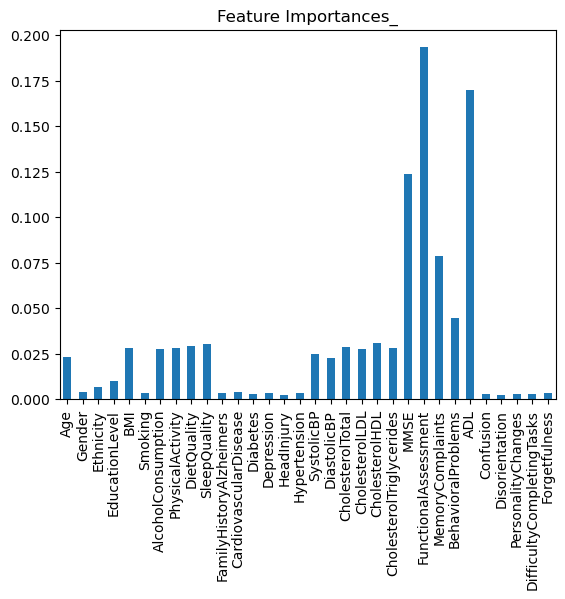

In [146]:
# create a dataframe and plot feature_importances_
features_importances_df = pd.DataFrame(feature_importance_dict, index=[0])

features_importances_df.T.plot(kind="bar", 
                        title="Feature Importances_",
                        legend=False);

#### Feature Importance: FunctionalAssessment
> Functional assessment score, ranging from 0 to 10. Lower scores indicate greater impairment.

#### Odds Ratio (OR) = Odds of Disease (feature = 1) / Odd of Disase (feature = 0)
* OR = 1 → No effect (Memory Complaints do not influence Diagnosis).
* OR > 1 → Higher risk (Memory Complaints increase the likelihood of Diagnosis).
* OR < 1 → Protective effect (Memory Complaints decrease the likelihood, which is unlikely here).


In [148]:
# compare to Diagnosis
pd.crosstab(pd.qcut(alzheimer_disease["FunctionalAssessment"], q=3, labels=["Low", "Medium", "High"]), alzheimer_disease["Diagnosis"])


Diagnosis,0,1
FunctionalAssessment,,
Low,314,402
Medium,472,245
High,603,113


### 3. Classification

#### Receiving Operating Characteristic (ROC) Curve

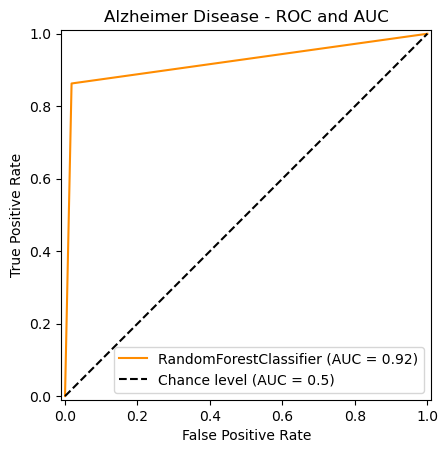

In [151]:
np.random.seed(42)
#make predictions
y_preds = clf.predict(X_test_scaled)

# Display roc curve metrics
display = RocCurveDisplay.from_predictions(y_true=y_test,
                                           y_pred=y_preds, 
                                           plot_chance_level=True,
                                           name="RandomForestClassifier",
                                           color='darkorange'
                                            )

_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Alzheimer Disease - ROC and AUC",
)

### Confusion Matrix

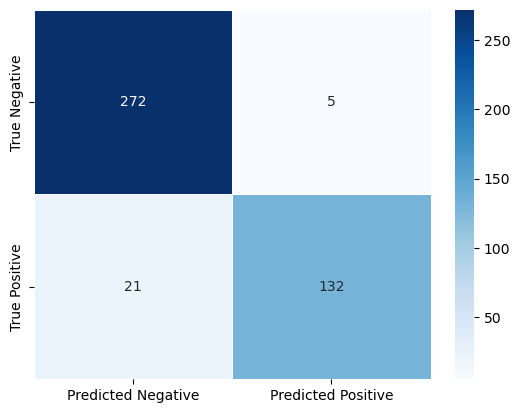

In [153]:
cm = confusion_matrix(y_true = y_test,
                      y_pred = y_preds)

cm_df = pd.DataFrame(cm,
                    index=["True Negative", "True Positive"],
                    columns=["Predicted Negative", "Predicted Positive"])

#plot confusion matrix
sns.heatmap(cm_df,
           cmap="Blues", #for better readability or `coolwarm`
           annot=True,
           fmt=".0f",
           linewidths=0.5);


### Classification Report

In [155]:
clf_report = classification_report(y_test,
                            y_preds)

print(clf_report)

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       277
           1       0.96      0.86      0.91       153

    accuracy                           0.94       430
   macro avg       0.95      0.92      0.93       430
weighted avg       0.94      0.94      0.94       430



### Cross Validation using `cross_validate`

In [213]:
# function to run `cross_validate`
scoring_list = ["accuracy", 
                "precision", 
               "recall",
               "f1"]

def evaluate_scoring(clf, X, y, scoring_list):
    results = {}
    if scoring_list: 
        for item in scoring_list:
            cv = cross_validate(clf,
                             X,
                             y,
                             scoring=item,
                             cv=5,
                             n_jobs=1)
            results[item] = cv["test_score"].mean()
        return results

scores = evaluate_scoring(clf, X, y, scoring_list)



#### Visualize cross validate metrics

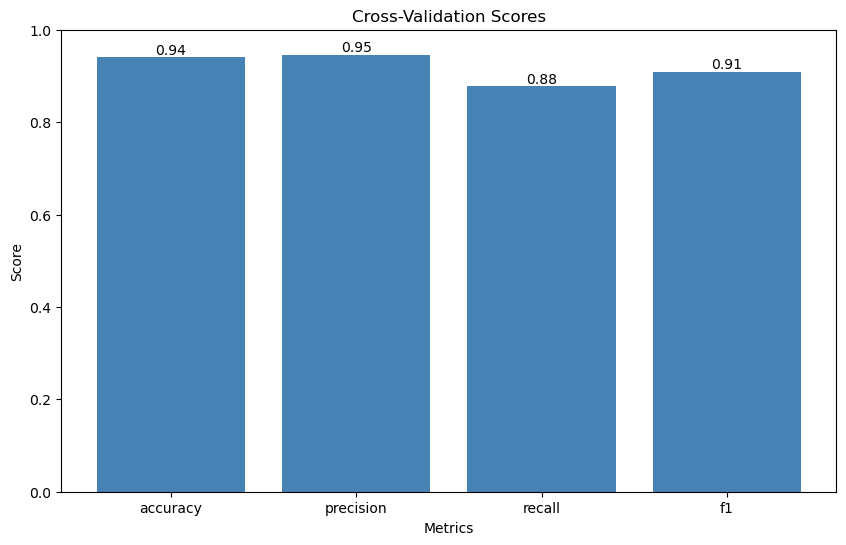

In [232]:
# plot the scores
plt.figure(figsize=(10,6))

bars = plt.bar(scores.keys(), scores.values(), color="steelblue")
for bar in bars:
    yval = bar.get_height()  # Get height (score value)
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.2f}", 
             ha="center", va="bottom", fontsize=10)
plt.xlabel("Metrics")
plt.ylabel("Score")
plt.title("Cross-Validation Scores")
plt.ylim(0, 1);